# Lecture 10 - Gaussian Process Regression

$
% DEFINITIONS
\newcommand{\bff}{\mathbf{f}}
\newcommand{\bm}{\mathbf{m}}
\newcommand{\bk}{\mathbf{k}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\bz}{\mathbf{z}}
\newcommand{\bA}{\mathbf{A}}
\newcommand{\bB}{\mathbf{B}}
\newcommand{\bC}{\mathbf{C}}
\newcommand{\bD}{\mathbf{D}}
\newcommand{\bI}{\mathbf{I}}
\newcommand{\bK}{\mathbf{K}}
\newcommand{\bL}{\mathbf{L}}
\newcommand{\bM}{\mathbf{M}}
\newcommand{\bX}{\mathbf{X}}
\newcommand{\bY}{\mathbf{Y}}
\newcommand{\bTheta}{\mathbf{\Theta}}
\newcommand{\calX}{\mathcal{X}}
\newcommand{\bLambda}{\boldsymbol{\Lambda}}
\newcommand{\bSigma}{\boldsymbol{\Sigma}}
\newcommand{\bmu}{\boldsymbol{\mu}}
\newcommand{\calN}{\mathcal{N}}
\newcommand{\calD}{\mathcal{D}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\C}{\mathbb{C}}
\newcommand{\Rd}{\R^d}
\newcommand{\Rdd}{\R^{d\times d}}
\newcommand{\bzero}{\mathbf{0}}
\newcommand{\GP}{\mbox{GP}}
% END OF DEFINITIONS
$ 





## Objectives

+ Quick recap of Gaussian processes (GP). 
+ Condition a GP on observed measurements 
+ Training a GP by maximization of the likelihood

## Reading

+ Please read [this](http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/pdfs/pdf2903.pdf) OR watch [this video lecture](http://videolectures.net/mlss03_rasmussen_gp/?q=MLSS).

+ [Section 5.4 in GP for ML textbook](http://www.gaussianprocess.org/gpml/chapters/RW5.pdf).



Recall, that in the previous lecture we discussed the following :

+ What is prior knowledge?

+ What is a Gaussian process (GP) ?

+ What are the properties of the mean and covariance functions of a Gaussian process and what kind of priors can we encode into a GP through the mean and the covariance kernel? 

+ How do we sample from a GP ?

Also, in Lecture 8, we had defined the regression problem and demonstrated the Bayesian interpretation of the Linear regression problem. We again define the regression model as follows: 
$$
y = f(\mathbf{x}) + \epsilon  
$$
with $\epsilon \sim \mathcal{N}(0, \sigma_{n}^{2})$ being a term to account for potentially noisy simulations. 

In this lecture, we shall talk about how we develop response functions to approximate a generic black box computer code (say $f(\cdot)$) in a manner that makes it compatible with our prior beliefs about the model. We do so, by using Bayes' rule and the Gaussian process regression method. Remember that our goal is to be able to propagate uncertainty in the inputs. 

We saw in the previous lecture that one's prior knowledge about the response can be modeled in terms of a generic GP. Let that prior state of knowledge be represented as follows: 
\begin{equation}
f(\cdot) | m(\cdot), k(\cdot, \cdot) \sim \GP\left(f(\cdot) | m(\cdot), k(\cdot, \cdot) \right),
\end{equation}

where the terms have their usual meaning i.e., $f(\cdot)$ is a generic response surface, $m(\cdot)$ is the prior mean function and $k(\cdot, \cdot)$ is the covariance kernel parameterized by a set of hyperparameters $\mathbf{\theta}$. Specifically, in the case of the squared exponential covariance kernel, $\mathbf{\theta} = \{s, l_1, l_2, \cdots, l_k\}$. Essentially, our prior beliefs about the model are encoded by assigning a prior probability distribution to these hyperparameters i.e., 
$
\mathbf{\theta} \sim p(\mathbf{\theta})
$

The mean function can have any functional form as discussed in the previous lecture. If one does not have any knowledge about generic trends in the response it is reasonable to assign a zero prior on the mean function. 

Now, assume that we make $n$ _measurements_ or _simulations_ at input locations $\bx_1, \bx_2, \cdots, \bx_n$ such that $\bx_i \in \R^{d}$. The corresponding observed outputs are $y_1, y_2, \cdots, y_n$, such that $y_i \in \R$. We write $\bX = \{\bx_1, \bx_2, \cdots, \bx_n\}$ and $\bY=\{y_1, y_2, \cdots, y_n\}$. Abusing mathematical notation slightly, we use the symbol $\calD$ to denote $\bX$ and $\bY$ collectively. We refer to $\calD$ as the _observed data_. How does the observed data $\calD$ affect our state of knowledge about the response surface? 


Using Bayes' rule, our new state of knowledge about the response function, conditioned upon the observed data, is another GP which can be expressed as follows: 

$$
f(\cdot)|\calD \sim GP(f(\cdot)| m^{*} (\cdot;\calD) k^{*}(\cdot, \cdot; \calD))
$$

with mean function: 
$$
m^{*}(\bx; \mathbf{\theta}) = m(\bx; \mathbf{\theta}) + \bk(\bx, \bX; \mathbf{\theta}) \bK(\bX, \bX; \mathbf{\theta})^{-1}(\bY-m(\bX; \mathbf{\theta}))
$$

and covariance function:
$$
k^{*}(\bx, \bx'; \mathbf{\theta}) = k(\bx, \bx'; \mathbf{\theta}) - \bk(\bx, \bX; \mathbf{\theta})\bK(\bX, \bX; \mathbf{\theta})^{-1}\bk(\bX, \bx'; \mathbf{\theta})
$$


and posterior distribution of the hyperparameters given by : 
$$
p(\mathbf{\theta}|\calD) = \frac{p(\calD|\mathbf{\theta})p(\mathbf{\theta})}{p(\calD)}
$$


where, 
$
p(\calD|\mathbf{\theta}) = p(\bY|\bX, \mathbf{\theta}) = \calN(\bY|m(\bX; \mathbf{\theta}), k(\bX, \bX; \mathbf{\theta}))
$
is called the _likelihood_ of the observed data $\calD$ and 
$
p(\calD) = \int p(\calD|\mathbf{\theta}) p(\mathbf{\theta}) d\mathbf{\theta}
$
is called the _evidence_.




### Training parameters of the Gaussian process - Maximum Likelihood Estimation (MLE)

In order to make the hyper-parameters of the GP model consistent with the observed data $\mathcal{D}$, we need to "train" the model on the observed data. The most commonly adopted approach to training the GP model is by maximizing the likelihood of the data given the choice of hyperparameters, i.e., 
$$
\mathbf{\Theta}^{*} = \arg\max p(\mathbf{\Theta}|\mathcal{D})
$$

In practice, the objective function for the above optimization problem is the logarithm (or negative logarithm) of the likelihood. This is done for both analytical tractability (the expression for the log likelihood is free of exponentials) and computational convenience (taking the logarithm helps prevent underflow or overflow). Thus, we formally redefine the optimization problem as follows: 

$$
\mathbf{\theta}^*, \sigma_{n}^{*} = \arg\min \mathcal{L}(\mathbf{\theta}, \mathbf{\sigma_n};\mathcal{D})
$$

where $\mathcal{L}$ is the called the log likelihood, $\mathbf{\theta}$ are the hyperparameters of the covariance kernel and $\sigma_n$ is the standard deviation of the Gaussian noise term assumed in the regression model. 

For a Gaussian process regression model with Gaussian likelihood, the quantity $\mathcal{L}$ i.e. the log lieklihood term is defined as follows: 
$$
\mathcal{L}(\mathbf{\theta}, \sigma_n | \mathcal{D}) = -\frac{1}{2}\mathbf{y}^T (\mathbf{K} + \sigma_{n}^{2}\mathbf{I})^{-1} \mathbf{y} -\frac{1}{2}\log |\mathbf{K} + \sigma_{n}^{2} \mathbf{I}| -\frac{n}{2} \log2\pi
$$
where $n$ is the number of dimensions in the input space. 

An analytical expression of this derivative is available and the reader is encouraged to consult [Section 5.4.1 of Rasmussen's textbook](http://www.gaussianprocess.org/gpml/chapters/RW5.pdf) for complete details.

This optimization problem can now be solved by a standard optimization algorithm such as [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm). This is typically a non-convex optimization problem (i.e. the objective function may have several local optima). This is not as problematic as one might expect. Different local optima correspond to different interpretations of the model. One may choose to take a weighted average of the predictions from different optima or one may restart the optimization process several times by varying the initial starting point in the hopes of eventually finding the global optima. 

In [1]:
import GPy
from IPython.display import display
import seaborn as sns
sns.set_context('paper')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
import numpy as np
np.random.seed(2645654)

### GP Regression in practice. 

In practice, we do not need to implement Gaussian process regression ourselves. We resort to using the excellent python module [GPy](https://sheffieldml.github.io/GPy/) to demonstrate GP Regression in action. 

Let us begin by demonstrating a simple case of 1-D regression. 

Assume that there is a scientific simulator $f$ which accepts a input parameter $x$ such that $x \in \mathbb{R}$ and returns a scalar output $y = f(x)$.

We are uncertain about the input $x$ but believe that $0 \leq x \leq 1$. We thus assign a flat prior distribution to $x$ i.e. $x \sim \mathcal{U}(0, 1)$. We are interested in propagating uncertainty through this model i.e. characterizing the mean behavior of the output $y$, $\mathbb{E}_y$ as well as it's variability $\mathbb{V}_y$. We could simply compute Monte-Carlo approximations of these quantities by sampling the input at a very large number of input locations. Instead, here we attempt to first build a surrogate model for the response using GP Regression using a finite number of simulations (say 10) of the input and then use Monte-Carlo to propagate uncertainty through the surrogate. 

Let us first define this simulator. 

In [2]:
#The scientific simulator.
f = lambda x: -np.cos(np.pi * x) + np.sin(4. * np.pi * x)  

Now we uniformly sample 10 inputs from the input space and compute the corresponding output: 

In [3]:
X = np.linspace(0, 1, 10).reshape(10, 1)
Y = f(X)

Now we use GPy to build our GP regression model. First, let us define the squared exponential covariance kernel:

In [4]:
k = GPy.kern.RBF(input_dim = 1, variance = 1., lengthscale = 1.)

The line code above define _k_ as a squared exponential kernel corresponding to a GP whose input space is 1 dimensional. The terms arguments _variance_ and _lengthscale_ correspond to the hyperparameters of this kernel. 

Now we define the model and print it's details:

In [5]:
model = GPy.models.GPRegression(X, Y, k)
print model


Name                              : GP regression
Log-likelihood                    : -13.6811171321
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |  Value  |  Constraint  |  Prior  |  Tied to
  rbf.variance             |    1.0  |     +ve      |         |         
  rbf.lengthscale          |    1.0  |     +ve      |         |         
  Gaussian_noise.variance  |    1.0  |     +ve      |         |         


Now let's try and make some predictions: 

In [6]:
x_test = np.random.uniform(low = 0, high = 1, size = (20, 1))
y_predict, V_predict = model.predict(x_test)
#y_predict, V_predict = model.predict(x_test, full_cov = True)

Note that the second line produces the variance at each of the test input points. In order to obtain the full covariance matrix for all the test input points, you may simply un-comment the 3rd line where the argument _full_cov_ is passed as True.

Let us plot the prediction: 

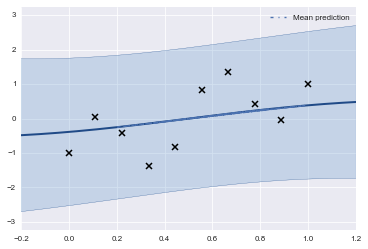

In [7]:
#get the 5% and 95% quantile:
y_p_lower = y_predict - 1.96 * np.sqrt(V_predict)
y_p_upper = y_predict + 1.96 * np.sqrt(V_predict)

#plot
model.plot()
#plt.plot(X, Y, 'kx', markersize=8, markeredgewidth=2, label='Observations')
plt.plot(x_test, y_predict, linestyle = '-.', label='Mean prediction')
#ax.plot(x_test, y_p_lower, linestyle='-.', color='red', label='5% and 95% quantiles', linewidth=1)
#ax.plot(x_test, y_p_upper, linestyle='-.', color='red', linewidth=1)
#plt.fill_between(x_test.flatten(), y_p_lower.flatten(), y_p_upper.flatten(), alpha=0.25)
plt.legend(loc = 'best')
plt.show()

This does not look like a very good fit. Perhaps our prior assumptions about the model hyperparameters are incorrect. Let us rectify that by setting the Gaussian noise variance to 0.

In [8]:
model.likelihood.variance = 0

Let us make predictions on this model again.

In [9]:
x_test = np.random.uniform(low = 0, high = 1, size = (20, 1))
y_predict, V_predict = model.predict(x_test)

Now let us visualize the predictions once more.

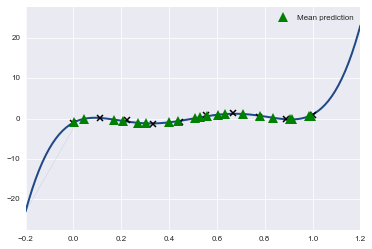

In [10]:
model.plot()
plt.plot(x_test, y_predict,'^', markersize = 10, color = 'green', label='Mean prediction')
plt.legend(loc = 'best')
plt.show()

This looks like a much better fit. Perhaps we can optimize it further. Maybe we can modify 
the lengthscale and the signal strength to get better estimates.

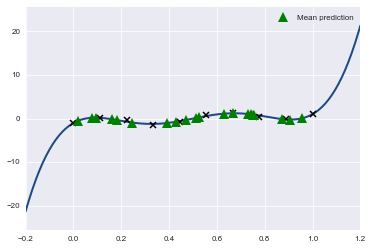

In [11]:
#change hyperparameter values
model.kern.lengthscale = 0.8
model.kern.variance = 0.2

#Resample test inputs and make new predictions.
x_test = np.random.uniform(low = 0, high = 1, size = (20, 1))
y_predict, V_predict = model.predict(x_test)

#plot again.
model.plot()
plt.plot(x_test, y_predict,'^', markersize = 10, color = 'green', label='Mean prediction')
plt.legend(loc = 'best')
plt.show()

We can fiddle around with these parameters all day but this is obviously not the right way to estimate the hyperparameters. As discussed earlier the correct way to do this is to use a suitable optimization algorithm to minimize the log likelihood of the GP model. In GPy, this is achieved with the _optimize_ or the _optimize_restarts_ method.

In [12]:
#Re-initialize the model
model = GPy.models.GPRegression(X, Y, k)

#optimize the model
model.optimize_restarts(num_restarts = 10)
print model


Name                              : GP regression
Log-likelihood                    : -7.43957900447
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |        Value        |  Constraint  |  Prior  |  Tied to
  rbf.variance             |       4.6664811449  |     +ve      |         |         
  rbf.lengthscale          |     0.210412427406  |     +ve      |         |         
  Gaussian_noise.variance  |  4.56569153203e-12  |     +ve      |         |         


The default optimization routine in GPy is the BFGS algorithm although there are a range of choices including _stochastic gradient_, _conjugate gradient_, _gradient descent_ etc.

Now that we have optimized the GP model, let us make predictions and plot the outcome again.

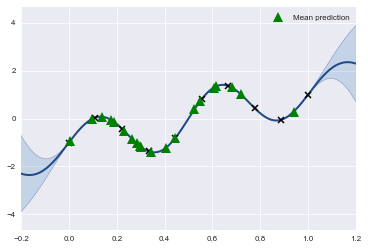

In [13]:
#Resample test inputs and make new predictions.
x_test = np.random.uniform(low = 0, high = 1, size = (20, 1))
y_predict, V_predict = model.predict(x_test)

#plot again.
model.plot()
plt.plot(x_test, y_predict,'^', markersize = 10, color = 'green', label='Mean prediction')
plt.legend(loc = 'best')
plt.show()

The surrogate model we just developed is cheap to evaluate and we can easily sample hundreds of thousands of evaluations of the response in a matter of seconds. Let us try to visualize the output probaility density function in the problem we just demonstrated. We already specified that the inputs are uncertain and have a uniform distribution:
$$
x \sim \mathcal{U}(0, 1)
$$

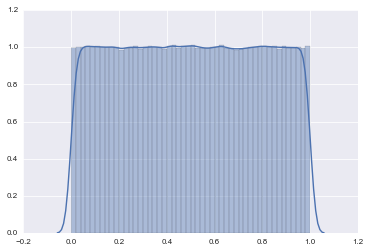

In [14]:
#sample a million observations of the input
x_test = np.random.uniform(low = 0., high = 1., size = (1000000, 1))

#visualize the input pdf:
sns.distplot(x_test)
plt.show()

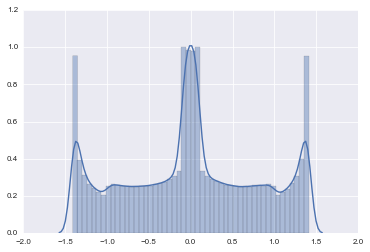

In [15]:
#Make prediction
y_p, K = model.predict(x_test) 

#visualize the PDF of the output:
sns.distplot(y_p)